<a href="https://colab.research.google.com/github/ChoiDae1/Machine-DeepLearing_Study/blob/main/LSTM_GRU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from tensorflow.keras.datasets import imdb
from sklearn.model_selection import train_test_split
(train_input, train_target),(test_input, test_target) = imdb.load_data(num_words=500)
train_input, val_input, train_target, val_target = train_test_split(train_input, train_target, test_size=0.2, random_state=42)
from tensorflow.keras.preprocessing.sequence import pad_sequences
train_seq = pad_sequences(train_input, maxlen=100)
val_seq = pad_sequences(val_input, maxlen=100)


In [3]:
from tensorflow import keras
model = keras.Sequential()
model.add(keras.layers.Embedding(500, 16, input_length=100))
model.add(keras.layers.LSTM(8,dropout=0.8,return_sequences=True))
model.add(keras.layers.LSTM(8,dropout=0.8))
model.add(keras.layers.Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 16)           8000      
                                                                 
 lstm (LSTM)                 (None, 100, 8)            800       
                                                                 
 lstm_1 (LSTM)               (None, 8)                 544       
                                                                 
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 9,353
Trainable params: 9,353
Non-trainable params: 0
_________________________________________________________________


In [4]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-2rnn-model.h5')
early_stopping_cb =keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model.fit(train_seq, train_target, validation_data=(val_seq, val_target), batch_size=64, callbacks=[checkpoint_cb, early_stopping_cb], epochs=100 )

Epoch 1/100
313/313 [==============================] - 22s 46ms/step - loss: 0.6931 - accuracy: 0.5106 - val_loss: 0.6926 - val_accuracy: 0.5262
Epoch 2/100
313/313 [==============================] - 13s 43ms/step - loss: 0.6918 - accuracy: 0.5348 - val_loss: 0.6908 - val_accuracy: 0.5942
Epoch 3/100
313/313 [==============================] - 13s 42ms/step - loss: 0.6884 - accuracy: 0.5698 - val_loss: 0.6832 - val_accuracy: 0.6352
Epoch 4/100
313/313 [==============================] - 13s 43ms/step - loss: 0.6706 - accuracy: 0.6149 - val_loss: 0.6433 - val_accuracy: 0.6696
Epoch 5/100
313/313 [==============================] - 13s 42ms/step - loss: 0.6420 - accuracy: 0.6407 - val_loss: 0.6075 - val_accuracy: 0.6944
Epoch 6/100
313/313 [==============================] - 13s 42ms/step - loss: 0.6201 - accuracy: 0.6654 - val_loss: 0.5800 - val_accuracy: 0.7118
Epoch 7/100
313/313 [==============================] - 13s 42ms/step - loss: 0.6003 - accuracy: 0.6849 - val_loss: 0.5577 - val_ac

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: Legend does not support 't' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: Legend does not support 'r' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: Legend does not support 'a' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  


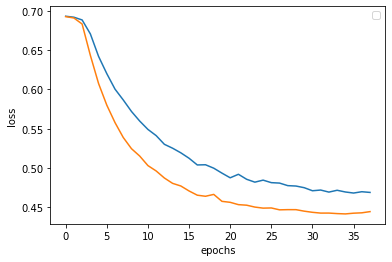

In [5]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend('train','val')
plt.show()

In [6]:
model2 = keras.Sequential()
model2.add(keras.layers.Embedding(500, 16, input_length=100))
model2.add(keras.layers.GRU(8))
model2.add(keras.layers.Dense(1,activation='sigmoid'))
model2.summary()
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model2.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-LSTM_model.h5')
early_stopping_cb =keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model2.fit(train_seq, train_target, validation_data=(val_seq, val_target), batch_size=64, callbacks=[checkpoint_cb, early_stopping_cb], epochs=100 )


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 16)           8000      
                                                                 
 gru (GRU)                   (None, 8)                 624       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 8,633
Trainable params: 8,633
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
313/313 [==============================] - 9s 22ms/step - loss: 0.6926 - accuracy: 0.5293 - val_loss: 0.6916 - val_accuracy: 0.5620
Epoch 2/100
313/313 [==============================] - 6s 21ms/step - loss: 0.6898 - accuracy: 0.5841 - val_loss: 0.6883 - val_accuracy: 0.5942
Epoch 3/100
313/313 [=======

In [7]:
model2.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-LSTM_model.h5')
early_stopping_cb =keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model2.fit(train_seq, train_target, validation_data=(val_seq, val_target), batch_size=64, callbacks=[checkpoint_cb, early_stopping_cb], epochs=100 )

Epoch 1/100
313/313 [==============================] - 9s 22ms/step - loss: 0.4130 - accuracy: 0.8140 - val_loss: 0.4407 - val_accuracy: 0.7940
Epoch 2/100
313/313 [==============================] - 7s 21ms/step - loss: 0.4127 - accuracy: 0.8156 - val_loss: 0.4374 - val_accuracy: 0.8000
Epoch 3/100
313/313 [==============================] - 7s 21ms/step - loss: 0.4120 - accuracy: 0.8179 - val_loss: 0.4376 - val_accuracy: 0.7980
Epoch 4/100
313/313 [==============================] - 7s 21ms/step - loss: 0.4118 - accuracy: 0.8163 - val_loss: 0.4398 - val_accuracy: 0.7948
Epoch 5/100
313/313 [==============================] - 7s 21ms/step - loss: 0.4115 - accuracy: 0.8158 - val_loss: 0.4368 - val_accuracy: 0.7982
Epoch 6/100
313/313 [==============================] - 6s 21ms/step - loss: 0.4113 - accuracy: 0.8164 - val_loss: 0.4400 - val_accuracy: 0.7932
Epoch 7/100
313/313 [==============================] - 7s 21ms/step - loss: 0.4110 - accuracy: 0.8166 - val_loss: 0.4370 - val_accuracy:

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: Legend does not support 't' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: Legend does not support 'r' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: Legend does not support 'a' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  


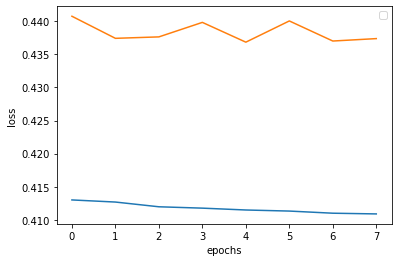

In [8]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend('train','val')
plt.show()

In [9]:
test_seq = pad_sequences(test_input, maxlen=100)
rnn_model = keras.models.load_model('best-2rnn-model.h5')
rnn_model.evaluate(test_seq,test_target )

782/782 [==============================] - 13s 16ms/step - loss: 0.4395 - accuracy: 0.7922


[0.439470499753952, 0.7921599745750427]